# Distribution Network

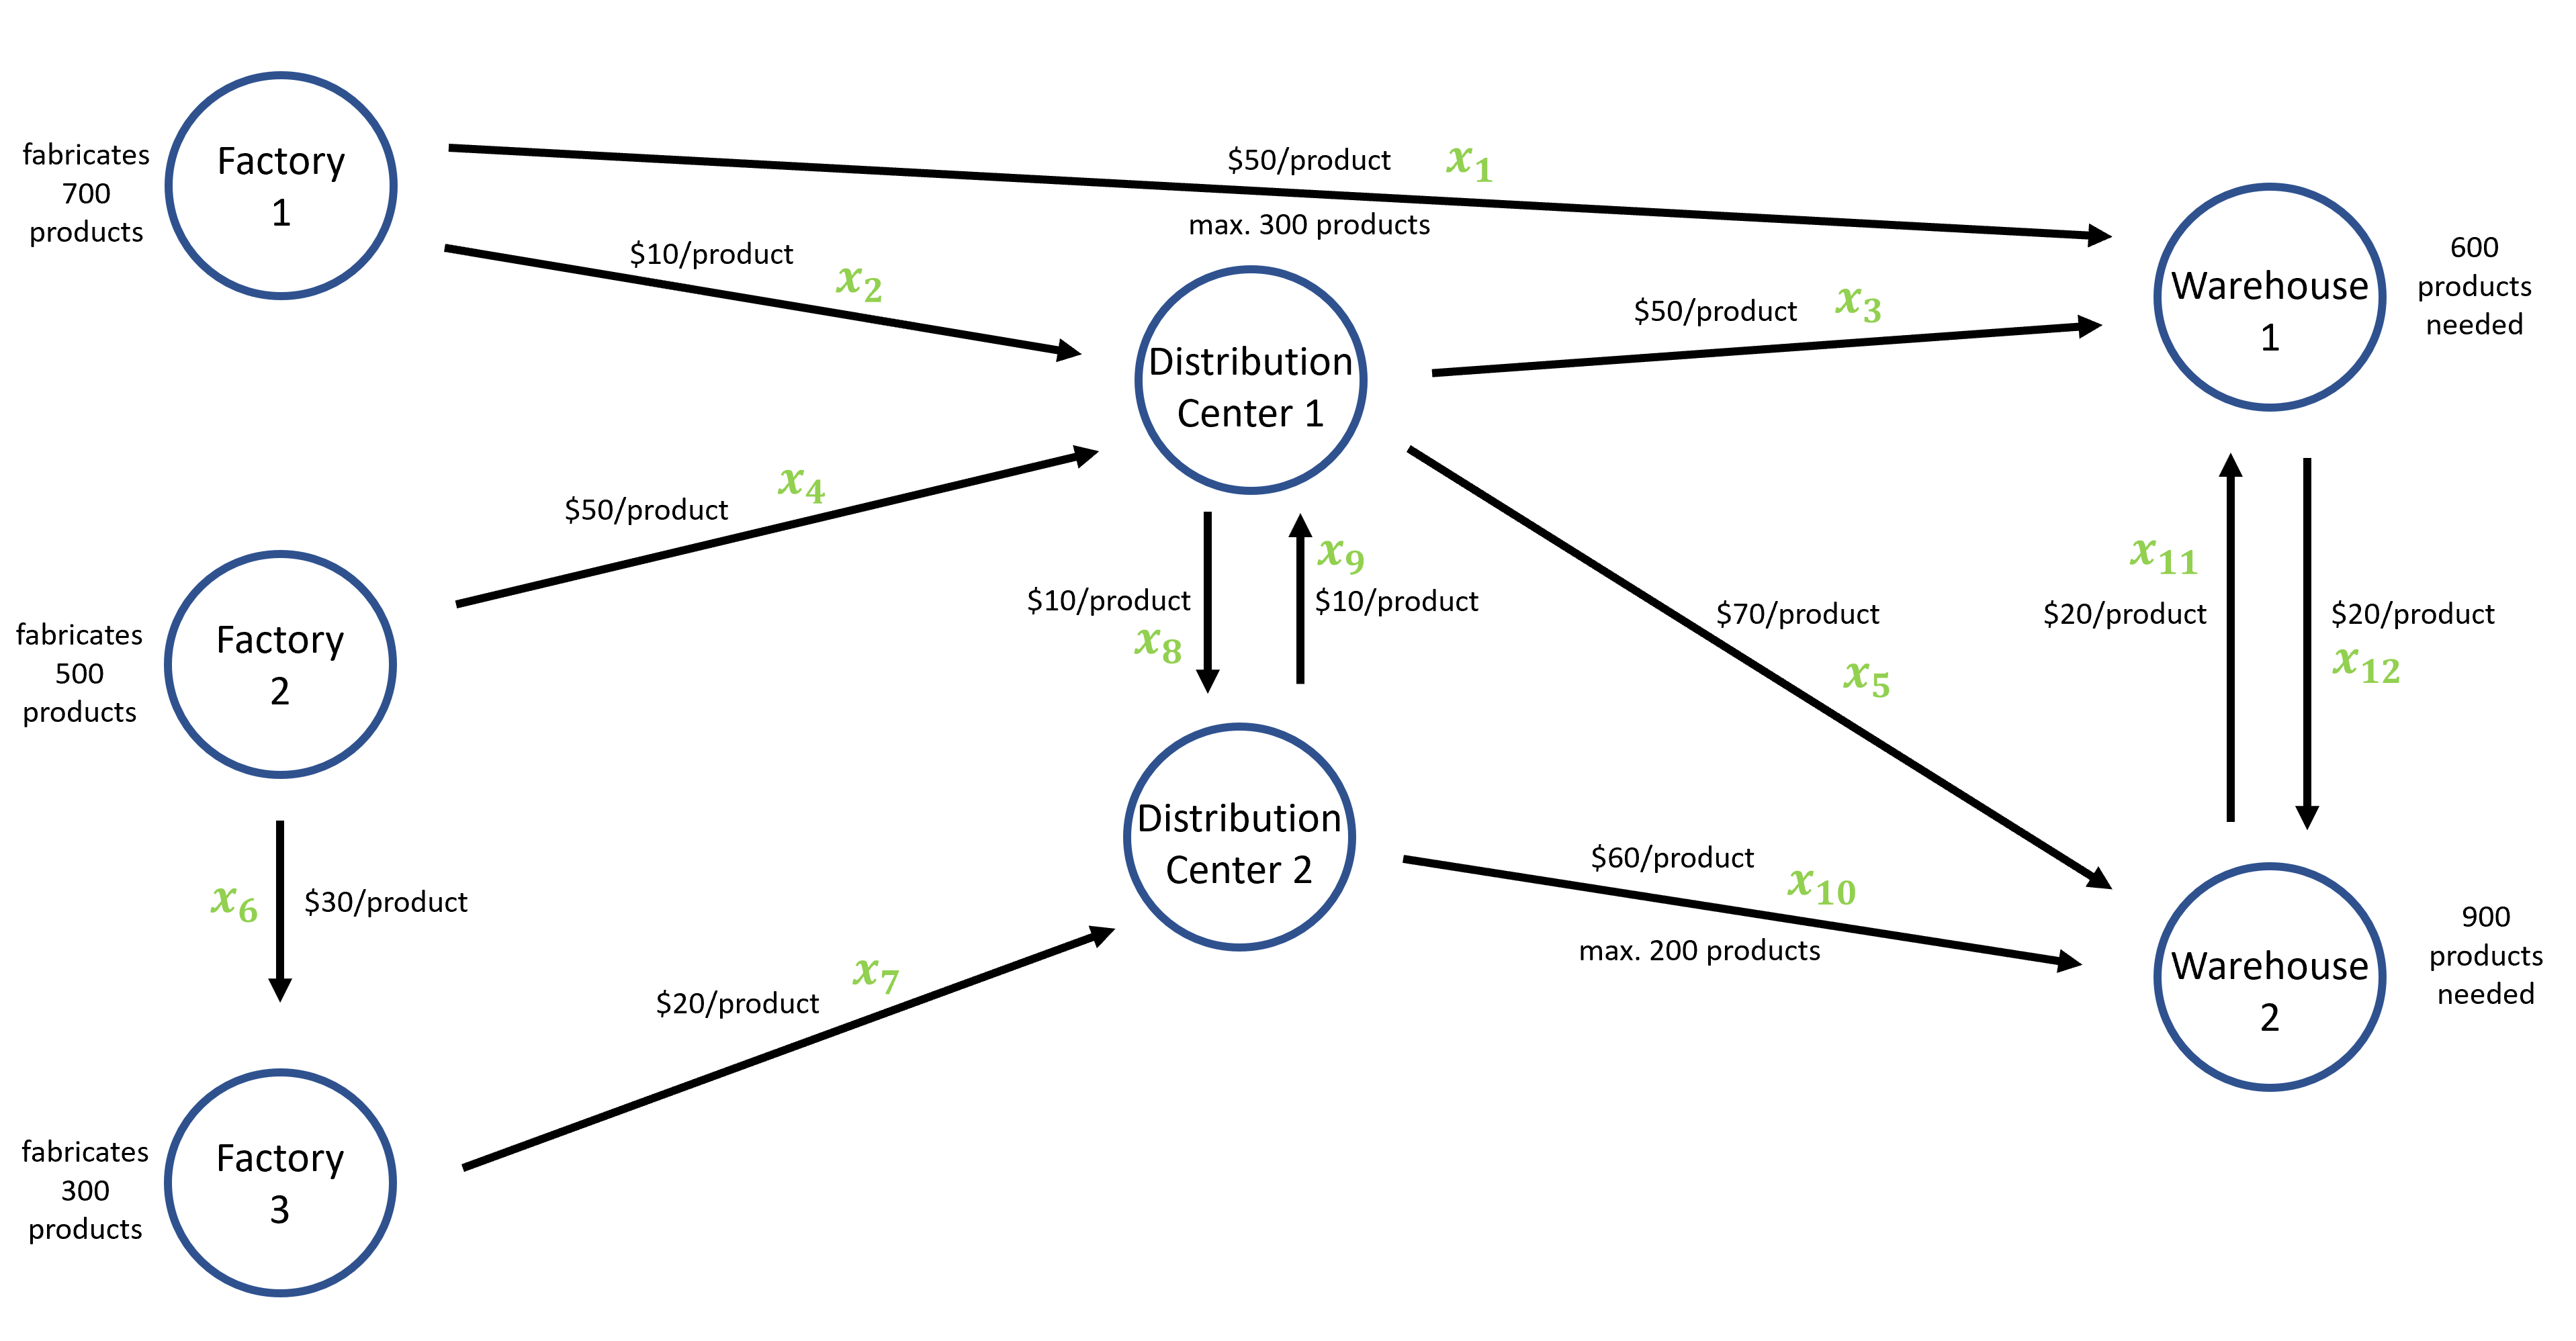

In [1]:
from pulp import LpMinimize, LpProblem, LpStatus, LpVariable

In [2]:
# Create the model
model = LpProblem(name="network", sense=LpMinimize)

In [3]:
# Initialize the decision variables
x1 = LpVariable(name="x1", lowBound=0) #the default lower bound is negative infinity
x2 = LpVariable(name="x2", lowBound=0)
x3 = LpVariable(name="x3", lowBound=0)
x4 = LpVariable(name="x4", lowBound=0)
x5 = LpVariable(name="x5", lowBound=0)
x6 = LpVariable(name="x6", lowBound=0)
x7 = LpVariable(name="x7", lowBound=0)
x8 = LpVariable(name="x8", lowBound=0)
x9 = LpVariable(name="x9", lowBound=0)
x10 = LpVariable(name="x10", lowBound=0)
x11 = LpVariable(name="x11", lowBound=0)
x12 = LpVariable(name="x12", lowBound=0)

In [4]:
# Add the constraints to the model
model += (x1 + x2 == 700, "Factory1") # define tuples that hold the constraints
model += (x4 + x6 == 500, "Factory2")
model += (-x6 + x7 == 300, "Factory3")

model += (x2 - x3 + x4 - x5 - x8 + x9 == 0, "Distribution_Center1")
model += (x7 + x8 - x9 - x10 == 0, "Distribution_Center2")

model += (x1 + x3 + x11 - x12 == 600, "Warehouse1")
model += (x5 + x10 - x11 + x12 == 900, "Warehouse2")

model += (x1 <= 300, "max_throughput_x1")
model += (x10 <= 200, "max_throughput_x5")

In [5]:
# Add the objective function to the model
obj_func = 50*x1 + 10*x2 + 50*x3 + 50*x4 + 70*x5 + 30*x6 + 20*x7 + 10*x8 + 10*x9 + 60*x10 + 20*x11 + 20*x12
model += obj_func

In [6]:
model

network:
MINIMIZE
50*x1 + 60*x10 + 20*x11 + 20*x12 + 10*x2 + 50*x3 + 50*x4 + 70*x5 + 30*x6 + 20*x7 + 10*x8 + 10*x9 + 0
SUBJECT TO
Factory1: x1 + x2 = 700

Factory2: x4 + x6 = 500

Factory3: - x6 + x7 = 300

Distribution_Center1: x2 - x3 + x4 - x5 - x8 + x9 = 0

Distribution_Center2: - x10 + x7 + x8 - x9 = 0

Warehouse1: x1 + x11 - x12 + x3 = 600

Warehouse2: x10 - x11 + x12 + x5 = 900

max_throughput_x1: x1 <= 300

max_throughput_x5: x10 <= 200

VARIABLES
x1 Continuous
x10 Continuous
x11 Continuous
x12 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous
x6 Continuous
x7 Continuous
x8 Continuous
x9 Continuous

In [7]:
# Solve the problem
model.solve()

1

In [8]:
# Check which solver was used
model.solver

In [9]:
print(f"status: {model.status}, {LpStatus[model.status]}")
# status is 1 if the optimum is found

status: 1, Optimal


In [10]:
print(f"objective: {model.objective.value()}")

objective: 127000.0


In [11]:
for var in model.variables():
    print(f"{var.name}: {var.value()}")

x1: 300.0
x10: 200.0
x11: 0.0
x12: 0.0
x2: 400.0
x3: 300.0
x4: 500.0
x5: 700.0
x6: 0.0
x7: 300.0
x8: 0.0
x9: 100.0
